### Wstęp

Tematem niniejszej pracy jest problem znalezienia rozwiązania gry ***SameGame*** przez algorytm genetyczny.

***SameGame***, pierwotnie wydawana pod nazwą *Chain Shot!*, to gra logiczna stworzona w Japonii w 1985 roku przez Kuniakiego Moribe. W 1992 roku została przeniesiona na platformę Unix i od tego czasu funkcjonuje pod obecną nazwą. Rok później zadebiutowała na platformie Windows 3.1, gdzie otrzymała angielskie tłumaczenie.

#### Zasady
Plansza ***SameGame*** jest kwadratem losowo wypełnionym kafelkami o różnych kolorach (zazwyczaj od trzech do pięciu). Celem gry jest usunięcie wszystkich kafelków. Gracz wybiera kafelek, który jest usuwany wraz z jego wszystkimi sąsiadami o tym samym kolorze. Kafelki powyżej spadają, zajmując powstałe wolne miejsce. Usunięcie całej kolumny powoduje przesunięcie się pozostałych kolumn do lewej. Gra się kończy plansza jest pusta lub skończą się możliwe ruchy.

Przeprowadzane eksperymenty w dalszych rozdziałach uwzględniają podane parametry:
- wielkość planszy
- liczba kolorów
- limit ruchów

### Rozdział I

#### Generowanie planszy

Poniższa funkcja **GenerateBoard** generuje planszę *A* x *B*, wypełnioną *N* kolorami (max. 5) i przedstawia ją w postaci macierzy. Każdy kolor jest reprezentowany przez liczbę:
- 1 - zielony
- 2 - czerwony
- 3 - niebieski
- 4 - żółty
- 5 - różowy

Kolor czarny (0) oznacza puste miejsce.

In [40]:
import random

colorids = [1, 2, 3, 4, 5]

def GenerateBoard(a,b,n):
    if n > len(colorids):
        return []

    matrix = []
    for i in range(a):
        matrix.append([])
        for _ in range(b):
            matrix[i].append(colorids[random.randint(0,n-1)])
    return matrix

Wykorzystując powyższą funkcję wygenerowano po trzy plansze w trzech rozmiarach: - mała, średnia, duża - oraz kolejno trzech, czterech i pięciu kolorach, które reprezentują poziom trudności gry (łącznie dziewięć plansz).
- plansze małe (8x8)

In [41]:
boardsmall1 = GenerateBoard(8,8,3)
boardsmall2 = GenerateBoard(8,8,4)
boardsmall3 = GenerateBoard(8,8,5)

- plansze średnie (12x12)

In [42]:
boardmedium1 = GenerateBoard(12,12,3)
boardmedium2 = GenerateBoard(12,12,4)
boardmedium3 = GenerateBoard(12,12,5)

- plansze duże (16x16)

In [43]:
boardbig1 = GenerateBoard(16,16,3)
boardbig2 = GenerateBoard(16,16,4)
boardbig3 = GenerateBoard(16,16,5)

Do wygodnej wizualizacji planszy przydatna będzie funkcja **PrintBoard** drukująca kolejne wiersze macierzy w odpowiednich kolorach. Funkcja ta wykorzystuje bibliotekę *colorama*.

In [73]:
from colorama import Style,Back

colors = {1:Back.GREEN,2:Back.RED,3:Back.BLUE,4:Back.YELLOW,5:Back.MAGENTA,0:Back.BLACK}

def PrintBoard(board):
    for i in board:
        print()
        for i2 in i:
            print(colors[i2],str(i2),end='')
    print(Style.RESET_ALL)

print("Jedna z wygenerowanych plansz:")
PrintBoard(boardmedium2)
PrintBoard(boardbig3)

Jedna z wygenerowanych plansz:

 1 2 3 2 2 4 1 2 2 3 1 4
 4 1 1 3 4 2 3 2 2 2 1 4
 1 2 3 2 1 4 4 3 2 3 4 4
 1 4 4 3 4 2 4 2 3 1 1 2
 4 2 1 3 2 1 1 1 2 3 3 2
 4 4 3 3 2 1 1 1 2 1 3 3
 3 2 3 2 2 3 4 1 4 2 3 1
 1 4 4 3 4 4 3 4 3 1 3 3
 1 1 3 2 4 1 1 2 2 3 1 4
 4 3 3 4 2 1 2 2 2 2 4 3
 3 3 2 3 2 2 3 4 1 3 4 2
 3 3 1 4 2 4 3 3 1 2 1 2

 1 2 1 3 2 3 3 2 2 4 3 5 4 2 4 2
 3 4 4 4 2 5 2 2 2 2 4 2 5 1 1 3
 2 4 2 2 1 1 4 2 2 3 2 2 5 4 4 2
 5 5 4 5 5 2 4 3 5 1 3 1 4 5 1 5
 3 2 2 3 2 1 3 2 3 1 1 2 4 4 3 3
 4 2 5 3 2 5 1 1 5 5 4 4 5 4 4 2
 5 5 5 3 4 4 2 2 3 3 3 4 2 3 5 5
 5 5 1 2 5 4 1 2 2 3 5 1 2 2 1 5
 1 1 3 2 3 3 2 5 2 4 2 4 5 5 4 1
 5 5 1 3 1 1 4 4 2 4 1 2 2 3 3 5
 1 1 3 2 4 3 2 2 4 4 5 4 5 4 1 4
 4 1 5 2 5 4 4 5 1 5 3 3 1 3 5 3
 5 5 3 4 2 1 2 3 2 1 4 2 1 4 2 4
 2 4 5 3 3 2 2 5 2 3 4 4 2 2 5 1
 1 5 4 5 1 5 1 5 5 2 5 3 4 1 4 1
 1 3 1 1 1 4 1 5 1 5 3 2 3 5 5 2


### Rozdział II
#### Operacje na planszy

W dalszych rozdziałach przydatne będą poniższe funkcje pozwalające na łatwe operowanie wartościami na planszy.

Podstawą usuwania kafelków jest szukanie "sąsiadów". Funkcja **FindNearby** znajduje wszystkie stykające się kafelki o tym samym kolorze w otoczeniu wybranego kafelka, a następnie zwraca ich listę.

In [45]:
def FindNearby(board,y,x,foundtiles):
    foundtiles.append([y,x]) # checked tile is definitely correct color so add it to foundtiles

    if x-1 >= 0: # check if next tile is in bounds; left -> y,x-1)
        if board[y][x] == board[y][x-1] and [y,x-1] not in foundtiles: # if so then check if next tile is the correct color and has not already been added to the list (checked)
            FindNearby(board,y,x-1,foundtiles)
        
    if x+1 < len(board[0]): # right -> y,x+1
        if board[y][x] == board[y][x+1] and [y,x+1] not in foundtiles:
            FindNearby(board,y,x+1,foundtiles)
    
    if y-1 >= 0: # up -> y-1,x
        if board[y][x] == board[y-1][x] and [y-1,x] not in foundtiles:
            FindNearby(board,y-1,x,foundtiles)

    if y+1 < len(board): # down -> y+1,x
        if board[y][x] == board[y+1][x] and [y+1,x] not in foundtiles:
            FindNearby(board,y+1,x,foundtiles)

    return foundtiles

Na podstawie otrzymanej listy kafelków, funkcja **RemoveTiles** usuwa zaznaczone kafelki poprzez zmianę ich wartości na 0. Kafelki znajdujące się nad usuwanymi "spadają", zajmując ich miejsce. Następnie funkcja porządkuje planszę, usuwając puste kolumny i przesuwając pozostałe do lewej strony.

In [46]:
def RemoveTiles(board,removedtiles): 
    for t in removedtiles:
        board[t[0]][t[1]] = 0

    for x in range (len(board[0])): # for each column | fix columns vertically
        newcolumn = []
        for y in range (len(board)): # for each row (each tile)
            if board[y][x] != 0:
                newcolumn.append(board[y][x])

        newcolumn = [0] * (len(board) - len(newcolumn)) + newcolumn # add zeros to empty spaces
        for y2 in range (len(newcolumn)): # update column
            board[y2][x] = newcolumn[y2]

    for x2 in range (len(board[0])): # check each column | fix columns horizontally
        tilesend = len(board[0])
        while board[-1][x2] == 0 and tilesend > 0:
            tilesend = tilesend - 1
            for x3 in range (x2+1,len(board[0])): # move each column after the empty one
                for y3 in range (len(board)):
                    board[y3][x3-1] = board[y3][x3]
            for x3 in range (x2+1,len(board[0])): # add empty column to the back
                for y3 in range (len(board)):
                    board[y3][-1] = 0

### Rozdział III

#### Algorytm genetyczny I - dążący do minimalizacji liczby kafelków

Rozwiązania są kodowane jako chromosomy, w których każdy gen jest liczbą całkowitą od 0 do *N* - 1, gdzie *N* oznacza liczbę wszystkich kafelków. Dzięki temu każdy kafelek można zidentyfikować przy użyciu tylko jednej liczby.

Funkcja **GenerateGeneSpace** zwraca listę numerów wszystkich kafelków. Pozwala to na wygenerowanie kodowania chromosomu w zależności od wymiarów planszy.

In [47]:
def GenerateGeneSpace(board):
    return [i for i in range(0, len(board)*len(board[0]))]

print("Macierz przedstawiająca jedną z plansz:")
for row in boardsmall1:
    print(row)
print("Lista kafelków tej planszy:")
print(GenerateGeneSpace(boardsmall1))

Macierz przedstawiająca jedną z plansz:
[2, 2, 3, 3, 2, 2, 2, 3]
[2, 2, 3, 1, 3, 1, 3, 2]
[2, 3, 3, 3, 1, 2, 2, 2]
[3, 3, 2, 2, 1, 2, 3, 2]
[1, 3, 3, 3, 3, 2, 3, 1]
[3, 2, 2, 1, 2, 3, 1, 3]
[3, 3, 3, 3, 3, 2, 2, 3]
[2, 3, 3, 3, 2, 2, 3, 2]
Lista kafelków tej planszy:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


Mając zatem na uwadze fakt, że kafelki są reprezentowane przez tylko jedną liczbę, przydatna będzie funkcja **FindTile** znajdująca współrzędne danego kafelka na planszy (wiersz i kolumna) na podstawie jego numeru oraz wymiarów planszy.

In [48]:
import math

def FindTile(n,board):
    y = math.floor(n/len(board[0]))
    x = n-(y*len(board[0]))
    return [y,x]

print("Macierz przedstawiająca jedną z plansz:")
for row in boardsmall1:
    print(row)
print("Współrzędne kafelka o indeksie 11 (dwunastego):",FindTile(11,boardsmall1))

Macierz przedstawiająca jedną z plansz:
[2, 2, 3, 3, 2, 2, 2, 3]
[2, 2, 3, 1, 3, 1, 3, 2]
[2, 3, 3, 3, 1, 2, 2, 2]
[3, 3, 2, 2, 1, 2, 3, 2]
[1, 3, 3, 3, 3, 2, 3, 1]
[3, 2, 2, 1, 2, 3, 1, 3]
[3, 3, 3, 3, 3, 2, 2, 3]
[2, 3, 3, 3, 2, 2, 3, 2]
Współrzędne kafelka o indeksie 11 (dwunastego): [1, 3]


 Ze względu na długość chromosomów populacja, reprezentowana przez zmienną **sol_per_pop**, będzie mała. Pozostałe parametry ustawiono tak, aby umożliwiały możliwie szybkie znalezienie rozwiązania problemu przez algorytm.

 Warto zauważyć dużą wartość parametru **num_generations**. Tak duża liczba pokoleń jest niezbędna ze względu na długość chromosomów, ale również nieuniknioną losowość genów. Jest prawdopodobne, że algorytm będzie potrzebował wielu pokoleń, aby wyeliminować niedoskonałości. Może również znaleźć rozwiązanie bardzo szybko, zwłaszcza przy małych planszach - w takim przypadku naturalnie zakończy pracę szybciej.

In [49]:
sol_per_pop = 100
num_parents_mating = 20
num_generations = 400 # 500
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 10

Wykorzystując powyższe funkcje, algorytm genetyczny symuluje grę, wybierając kolejne kafelki na podstawie genów, a na końcu funkcja **fitness** każdemu chromosomowi przypisuje wartość będącą liczbą kafelków pozostałych na planszy. Zatem najlepsze rozwiązanie ma wartość 0.

Jeśli algorytm wybierze puste miejsce (kafelek o wartości 0) lub kafelek bez sąsiadów o tym samym kolorze (co jest niedozwolonym ruchem), plansza nie ulegnie zmianie.

In [50]:
import pygad
import time

def RunGeneticAlgorithm1(board,num_genes):
    def fitness(solution, solution_id):
        newboard = [row[:] for row in board]
        for t in solution:
            chosentile = FindTile(int(t),newboard)
            if not newboard[chosentile[0]][chosentile[1]] == 0: # if chosen tile is not empty
                removedtiles = FindNearby(newboard,chosentile[0],chosentile[1],[])
                if not len(removedtiles) == 1: # do not delete if chosen tile is a single one
                    RemoveTiles(newboard,removedtiles)
        flatboard = [t for sublist in newboard for t in sublist]
        empty = flatboard.count(0)
        tilesleft = len(flatboard) - empty
        return -tilesleft

    starttime = time.time()
    ga_instance = pygad.GA(gene_space=GenerateGeneSpace(board),
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=['reach_0'])

    ga_instance.run()
    endtime = time.time()
    return ga_instance, (endtime-starttime)



Wartość każdego genu oznacza kolejny wybrany kafelek. Zmienna **num_genes** oznacza liczbę genów w chromosomie, zatem jest równoznaczna z narzuconym limitem ruchów. Naturalnie większe plansze będą wymagały większej liczby ruchów, zatem dla każdego z trzech rozmiarów ten parametr będzie miał inną wartość.

In [51]:
num_genes_small = 50
num_genes_medium = 100
num_genes_big = 150

Aby lepiej zaprezentować najlepsze rozwiązanie algorytmu, przydatna będzie poniższa funkcja **PrintBestSolution**, będąca zmodyfikowanym fragmentem funkcji **fitness**. Funkcja ta wyświetla stan planszy po wykonaniu wszystkich ruchów. W najlepszym wypadku będzie to macierz wypełniona zerami.

In [52]:
def PrintBestSolution(solution,board):
    newboard = [row[:] for row in board]
    for t in solution:
        chosentile = FindTile(int(t),newboard)
        if not newboard[chosentile[0]][chosentile[1]] == 0:
            removedtiles = FindNearby(newboard,chosentile[0],chosentile[1],[])
            if not len(removedtiles) == 1:
                RemoveTiles(newboard,removedtiles)
    PrintBoard(newboard)

Poniższy kod uruchamia algorytm dla wybranej planszy, a następnie wyświetla wyniki.


 2 2 3 3 2 2 2 3
 2 2 3 1 3 1 3 2
 2 3 3 3 1 2 2 2
 3 3 2 2 1 2 3 2
 1 3 3 3 3 2 3 1
 3 2 2 1 2 3 1 3
 3 3 3 3 3 2 2 3
 2 3 3 3 2 2 3 2

 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
Parametry najlepszego rozwiązania : [ 8. 31. 48.  0. 21. 20. 55. 57. 28. 23. 30. 52.  0. 17.  1.  1.  3. 10.
  7. 16. 39. 32. 60. 47. 21. 62. 19.  9. 21.  9. 32. 63.  9. 22. 55. 39.
 57. 44. 58. 15. 31.  4. 41. 20. 39. 48. 34. 41. 45. 18.]
Wartość fitness najlepszego rozwiązania : 0
Generacja najlepszego rozwiązania : 1
Czas operacji : 0.21913623809814453


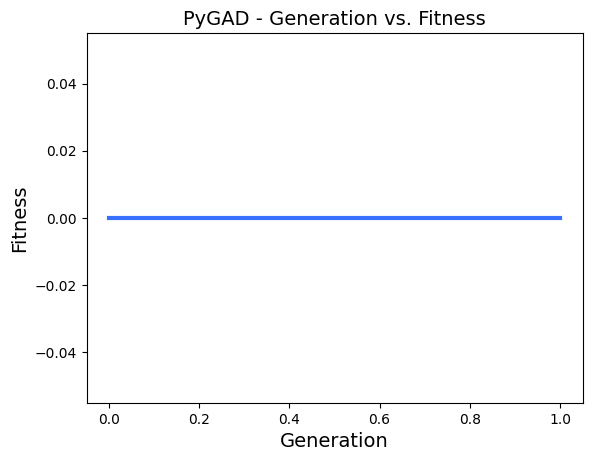

In [53]:

ga_instance, timetaken = RunGeneticAlgorithm1(boardsmall1, num_genes_small)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
PrintBoard(boardsmall1)
PrintBestSolution(solution,boardsmall1)

print("Parametry najlepszego rozwiązania :", solution)
print("Wartość fitness najlepszego rozwiązania :",solution_fitness)
print("Generacja najlepszego rozwiązania :", ga_instance.best_solution_generation+1)
print("Czas operacji :",timetaken)

p = ga_instance.plot_fitness()

### Rozdział IV

#### Algorytm genetyczny II - dążący do minimalizacji liczby grup kafelków

Algorytm genetyczny może działać lepiej, jeżeli będzie dążył nie do usunięcia wszystkich kafelków, ale do zredukowania liczby różnokolorowych pól do minimum. Będzie do tego potrzebna funkcja licząca "grupy" kafelków.

In [54]:
def CountGroups(board):
    groups = []
    for x in range (len(board[0])): # for each column
        for y in range (len(board)): # for each row
            checkedtiles = [item for sublist in groups for item in sublist]
            if board[y][x] != 0 and [y,x] not in checkedtiles: # this tile's group has not been added to groups yet
                groups.append(FindNearby(board,y,x,[]))

    return len(groups)

PrintBoard(boardsmall1)
print("Liczba jednokolorowych grup na tej planszy: ",CountGroups(boardsmall1))


 2 2 3 3 2 2 2 3
 2 2 3 1 3 1 3 2
 2 3 3 3 1 2 2 2
 3 3 2 2 1 2 3 2
 1 3 3 3 3 2 3 1
 3 2 2 1 2 3 1 3
 3 3 3 3 3 2 2 3
 2 3 3 3 2 2 3 2
Liczba jednokolorowych grup na tej planszy:  25


In [55]:
def RunGeneticAlgorithm2(board,num_genes):
    def fitness(solution, solution_id):
        newboard = [row[:] for row in board]
        groupcount = CountGroups(newboard)
        for t in solution:
            chosentile = FindTile(int(t),newboard)
            if not newboard[chosentile[0]][chosentile[1]] == 0: # if chosen tile is not empty
                removedtiles = FindNearby(newboard,chosentile[0],chosentile[1],[])
                if not len(removedtiles) == 1: # do not delete if chosen tile is a single one
                    RemoveTiles(newboard,removedtiles)
                    groupcount = CountGroups(newboard)
        return -groupcount

    starttime = time.time()
    ga_instance = pygad.GA(gene_space=GenerateGeneSpace(board),
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=['reach_0'])

    ga_instance.run()
    endtime = time.time()
    return ga_instance, (endtime-starttime)


Powyższy algorytm działa podobnie do tego w poprzednim rozdziale, ale funkcja **fitness** każdemu chromosomowi przypisuje ilość pozostałych grup kafelków. Zatem ponownie najlepsze rozwiązanie będzie miało wartość 0.


 2 2 3 3 2 2 2 3
 2 2 3 1 3 1 3 2
 2 3 3 3 1 2 2 2
 3 3 2 2 1 2 3 2
 1 3 3 3 3 2 3 1
 3 2 2 1 2 3 1 3
 3 3 3 3 3 2 2 3
 2 3 3 3 2 2 3 2

 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
Parametry najlepszego rozwiązania : [ 9. 30.  0. 18. 40.  8. 33. 60. 24.  6. 43. 44. 49. 35. 50. 32. 45. 12.
  3. 37. 34. 27. 33. 45. 60. 17.  9.  9. 18. 54. 20.  7. 38.  9. 47.  0.
 44. 13. 21. 30.  5.  7. 39. 58. 25.  5. 27. 46.  8.  9.]
Wartość fitness najlepszego rozwiązania : 0
Generacja najlepszego rozwiązania : 1
Czas operacji : 0.6007544994354248


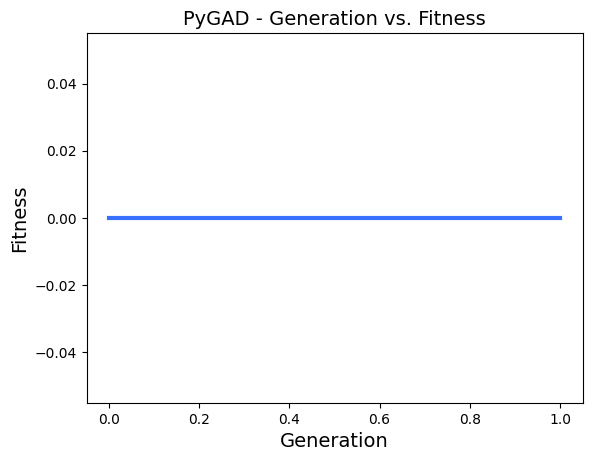

In [56]:
ga_instance, timetaken = RunGeneticAlgorithm2(boardsmall1, num_genes_small)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
PrintBoard(boardsmall1)
PrintBestSolution(solution,boardsmall1)

print("Parametry najlepszego rozwiązania :", solution)
print("Wartość fitness najlepszego rozwiązania :",solution_fitness)
print("Generacja najlepszego rozwiązania :", ga_instance.best_solution_generation+1)
print("Czas operacji :",timetaken)

p = ga_instance.plot_fitness()

### Rozdział V

#### Algorytm genetyczny III - dążący do minimalizacji liczby kafelków oraz z karą za utworzenie nowej grupy

Algorytmy z dwóch poprzednich rozdziałów działają dosyć dobrze. Warto sprawdzić, jaki wynik da ich połączenie.

In [57]:
def RunGeneticAlgorithm3(board,num_genes):

    def fitness(solution, solution_id):
        newboard = [row[:] for row in board]
        groupcount = CountGroups(newboard)
        penalty = 0
        for t in solution:
            chosentile = FindTile(int(t),newboard)
            if not newboard[chosentile[0]][chosentile[1]] == 0: # if chosen tile is not empty
                removedtiles = FindNearby(newboard,chosentile[0],chosentile[1],[])
                if not len(removedtiles) == 1: # do not delete if chosen tile is a single one
                    RemoveTiles(newboard,removedtiles)
                    newgroupcount = CountGroups(newboard)
                    if newgroupcount == 0:
                        return 0
                    if newgroupcount > groupcount:
                        penalty = penalty + 100
                    groupcount = newgroupcount

        flatboard = [t for sublist in newboard for t in sublist]
        empty = flatboard.count(0)
        tilesleft = len(flatboard) - empty
        return -(tilesleft + penalty)

    starttime = time.time()
    ga_instance = pygad.GA(gene_space=GenerateGeneSpace(board),
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=['reach_0'])

    ga_instance.run()
    endtime = time.time()
    return ga_instance, (endtime-starttime)

Powyższy algorytm dąży do usunięcia wszystkich kafelków, podobnie jak Algorytm I. Ponadto, utworzenie nowej grupy wiąże się z dużą karą.


 2 2 3 3 2 2 2 3
 2 2 3 1 3 1 3 2
 2 3 3 3 1 2 2 2
 3 3 2 2 1 2 3 2
 1 3 3 3 3 2 3 1
 3 2 2 1 2 3 1 3
 3 3 3 3 3 2 2 3
 2 3 3 3 2 2 3 2

 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
Parametry najlepszego rozwiązania : [14. 15. 45. 17. 20. 26. 23. 20. 30. 11. 57.  0. 34. 29. 24. 47. 44. 40.
  2. 45. 51. 50. 40. 50. 45. 51. 23. 56. 46. 52. 38. 38.  8. 60. 12. 33.
 42. 23. 18. 38. 56.  0.  1. 49. 51. 60. 44. 45.  6.  1.]
Wartość fitness najlepszego rozwiązania : 0
Generacja najlepszego rozwiązania : 1
Czas operacji : 0.5860366821289062


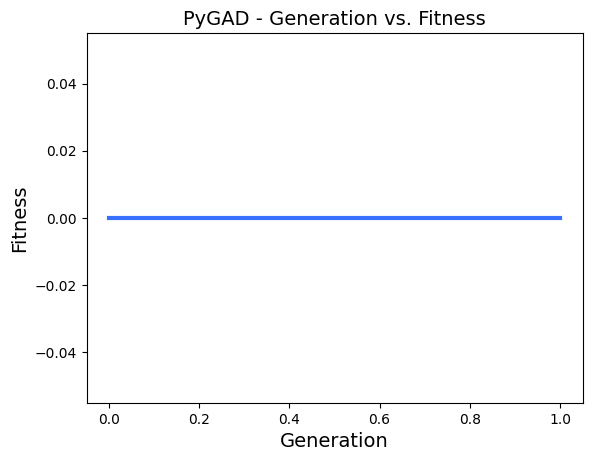

In [58]:
ga_instance, timetaken = RunGeneticAlgorithm3(boardsmall1, num_genes_small)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
PrintBoard(boardsmall1)
PrintBestSolution(solution,boardsmall1)

print("Parametry najlepszego rozwiązania :", solution)
print("Wartość fitness najlepszego rozwiązania :",solution_fitness)
print("Generacja najlepszego rozwiązania :", ga_instance.best_solution_generation+1)
print("Czas operacji :",timetaken)

p = ga_instance.plot_fitness()

### Rozdział VI

#### Algorytm genetyczny IV - używający punktacji SameGame

Gra SameGame oferuje punktację obliczaną według wzoru:

$$ score = (k−2)^2 $$

gdzie *k* jest liczbą usuwanych kafelków w danym ruchu. Duże grupy są punktowane wykładniczo wyżej niż małe. Warto przetestować, czy algorytm lepiej sobie poradzi, jeśli będzie dążył do zebrania jak największej liczby punktów.

In [59]:
def RunGeneticAlgorithm4(board,num_genes):
    def fitness(solution, solution_id):
        newboard = [row[:] for row in board]
        totalpoints = 0
        for t in solution:
            chosentile = FindTile(int(t),newboard)
            if not newboard[chosentile[0]][chosentile[1]] == 0: # if chosen tile is not empty
                removedtiles = FindNearby(newboard,chosentile[0],chosentile[1],[])
                if not len(removedtiles) == 1: # do not delete if chosen tile is a single one
                    RemoveTiles(newboard,removedtiles)
                    movepoints = (len(removedtiles)-2) ** 2
                    totalpoints = totalpoints + movepoints
                else:
                    totalpoints = totalpoints - 2
            else:
                totalpoints = totalpoints - 2
        
        flatboard = [t for sublist in newboard for t in sublist]
        empty = flatboard.count(0)
        if empty == len(flatboard):
            totalpoints = totalpoints + 10000
                     
        return totalpoints

    starttime = time.time()
    ga_instance = pygad.GA(gene_space=GenerateGeneSpace(board),
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=['reach_10000'])

    ga_instance.run()
    endtime = time.time()

    return ga_instance, (endtime-starttime)

Powyższa funkcja *fitness* zlicza sumę punktów ze wszystich ruchów. Wyczyszczenie planszy powoduje otrzymanie bardzo dużej nagrody. Algorytm zakończy pracę, kiedy ją dostanie. Ponadto, próba usunięcia pustego miejsca lub pojedynczego kafelka skutkuje otrzymaniem małej kary.


 2 2 3 3 2 2 2 3
 2 2 3 1 3 1 3 2
 2 3 3 3 1 2 2 2
 3 3 2 2 1 2 3 2
 1 3 3 3 3 2 3 1
 3 2 2 1 2 3 1 3
 3 3 3 3 3 2 2 3
 2 3 3 3 2 2 3 2

 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
Parametry najlepszego rozwiązania : [63. 58. 21.  4. 18. 46. 57. 18.  1. 29. 43. 13. 52. 60.  3.  6. 31.  4.
 35.  8. 50. 47. 12. 51. 16.  0. 49. 39. 27. 35. 54. 56. 43. 19. 17. 12.
 25. 63. 18. 60. 36. 53. 32. 57. 45.  8. 29. 34.  6. 58.]
Wartość fitness najlepszego rozwiązania : 10314
Generacja najlepszego rozwiązania : 1
Czas operacji : 0.21082568168640137


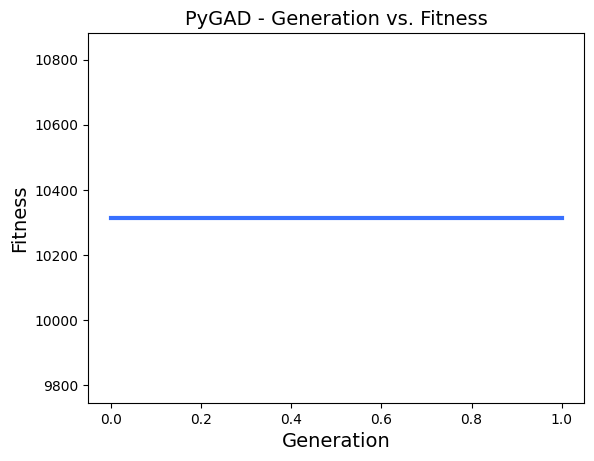

In [60]:
ga_instance, timetaken = RunGeneticAlgorithm4(boardsmall1, num_genes_small)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
PrintBoard(boardsmall1)
PrintBestSolution(solution,boardsmall1)

print("Parametry najlepszego rozwiązania :", solution)
print("Wartość fitness najlepszego rozwiązania :",solution_fitness)
print("Generacja najlepszego rozwiązania :", ga_instance.best_solution_generation+1)
print("Czas operacji :",timetaken)

p = ga_instance.plot_fitness()

Aby porównać ten algorytm z pozostałymi potrzebna będzie funkcja, która liczy ile zostało kafelków na planszy. Poniższa funkcja **CountTileLeftAfterSolution** aplikuje ruchy najlepszego rozwiązania na planszy i zwraca wynik.

In [61]:
def CountTilesLeftAfterSolution(solution, board):
    newboard = [row[:] for row in board]
    for t in solution:
        chosentile = FindTile(int(t), newboard)
        if not newboard[chosentile[0]][chosentile[1]] == 0:
            removedtiles = FindNearby(newboard, chosentile[0], chosentile[1], [])
            if not len(removedtiles) == 1:
                RemoveTiles(newboard, removedtiles)
    flatboard = [t for sublist in newboard for t in sublist]
    empty = flatboard.count(0)
    tilesleft = len(flatboard) - empty
    return tilesleft

### Rozdział VII

#### Algorytm genetyczny V - dążący do minimalizacji liczby kroków

Warto sprawdzić, jak poradzi sobie algorytm, który będzie dążył do wyczyszczenia planszy przy jak najmniejszej liczbie ruchów.

In [62]:
def RunGeneticAlgorithm5(board,num_genes):
    def fitness(solution, solution_id):
        newboard = [row[:] for row in board]
        totalmoves = 0
        for t in solution:
            totalmoves = totalmoves + 1
            chosentile = FindTile(int(t),newboard)
            if not newboard[chosentile[0]][chosentile[1]] == 0: # if chosen tile is not empty
                removedtiles = FindNearby(newboard,chosentile[0],chosentile[1],[])
                if not len(removedtiles) == 1: # do not delete if chosen tile is a single one
                    RemoveTiles(newboard,removedtiles)
                else:
                    totalmoves = totalmoves + 1
            else:
                totalmoves = totalmoves + 1
            
            flatboard = [t for sublist in newboard for t in sublist]
            empty = flatboard.count(0)
            if empty == len(flatboard):
                return 0
                     
        return -totalmoves

    starttime = time.time()
    ga_instance = pygad.GA(gene_space=GenerateGeneSpace(board),
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=['reach_0'])

    ga_instance.run()
    endtime = time.time()

    return ga_instance, (endtime-starttime)

Podobnie jak poprzedni, powyższy algorytm penalizuje wybranie pustego miejsca lub pustego kafelka - liczy taki krok podwójnie. Funkcja **fitness** przyjmuje wartość ujemnej liczby ruchów. Oczywiście algorytm nigdy nie osiągnie wyniku 0, dlatego wyczyszczenie planszy skutkuje przybraniem tej wartości.


 2 2 3 3 2 2 2 3
 2 2 3 1 3 1 3 2
 2 3 3 3 1 2 2 2
 3 3 2 2 1 2 3 2
 1 3 3 3 3 2 3 1
 3 2 2 1 2 3 1 3
 3 3 3 3 3 2 2 3
 2 3 3 3 2 2 3 2

 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0
Parametry najlepszego rozwiązania : [52. 48. 18. 45. 55.  1. 30. 36. 56. 28. 30. 38. 61. 49. 27. 46. 62. 41.
 22. 63. 54. 34. 18.  1. 56. 25. 62.  0. 36. 35. 48. 56. 39.  3. 29. 62.
 54.  8. 29. 38. 50. 58. 11. 35. 49. 32. 37. 21. 56. 34.]
Wartość fitness najlepszego rozwiązania : 0
Generacja najlepszego rozwiązania : 1
Czas operacji : 0.2772395610809326


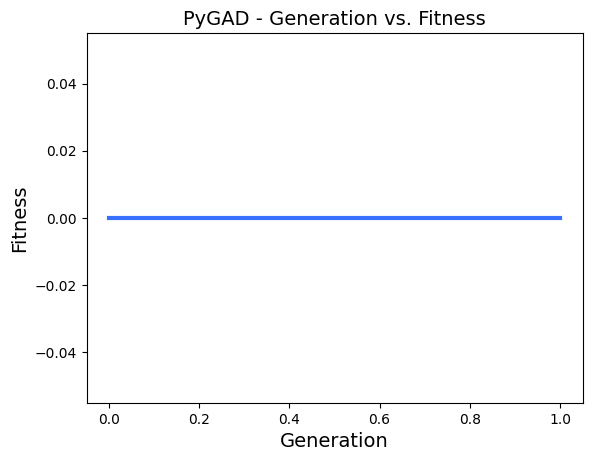

In [63]:
ga_instance, timetaken = RunGeneticAlgorithm5(boardsmall1, num_genes_small)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
PrintBoard(boardsmall1)
PrintBestSolution(solution,boardsmall1)

print("Parametry najlepszego rozwiązania :", solution)
print("Wartość fitness najlepszego rozwiązania :",solution_fitness)
print("Generacja najlepszego rozwiązania :", ga_instance.best_solution_generation+1)
print("Czas operacji :",timetaken)

p = ga_instance.plot_fitness()

### Rozdział VIII

#### Porównanie wyników

Poniższa funkcja **Average** pozwala na zebranie średniej wyników danej liczby rozwiązań algorytmu.

In [ ]:
import numpy as np

def Average(algorithm,board,num_genes,count):
    gatheredtimes = []
    gatheredfitness = []
    gatheredgenerations = []

    for i in range(count):
        ga_instance, timetaken = algorithm(board, num_genes)
        solution, solution_fitness, solution_idx = ga_instance.best_solution()
        gatheredtimes.append(timetaken)
        gatheredfitness.append(CountTilesLeftAfterSolution(solution, board))
        gatheredgenerations.append(ga_instance.best_solution_generation+1)
        print("Ukończono : ",i+1,"/",count,"( Czas:",timetaken,"s, Pozostałe kafelki:",gatheredfitness[-1],"/",len(board)*len(board),"Generacja: ",gatheredgenerations[-1],")")

    print("Średni czas : ",np.average(gatheredtimes))
    print("Średnia liczba pozostałych kafelków : ",np.average(gatheredfitness),"/",len(board)*len(board))
    print("Średni procent usuniętych kafelków : ",(1 - np.average(gatheredfitness)/(len(board)*len(board[0])))*100, "%")
    print("Średnia generacja najlepszego rozwiązania : ",np.average(gatheredgenerations))


PrintBoard(boardsmall1)
Average(RunGeneticAlgorithm5, boardsmall1, num_genes_small, 10)


 2 2 3 3 2 2 2 3
 2 2 3 1 3 1 3 2
 2 3 3 3 1 2 2 2
 3 3 2 2 1 2 3 2
 1 3 3 3 3 2 3 1
 3 2 2 1 2 3 1 3
 3 3 3 3 3 2 2 3
 2 3 3 3 2 2 3 2
Ukończono :  1 / 10 ( Czas: 0.2618560791015625 s, Pozostałe kafelki: 0 / 64 Generacja:  1 )
Ukończono :  2 / 10 ( Czas: 0.25211358070373535 s, Pozostałe kafelki: 0 / 64 Generacja:  1 )
Ukończono :  3 / 10 ( Czas: 0.15208745002746582 s, Pozostałe kafelki: 0 / 64 Generacja:  1 )
Ukończono :  4 / 10 ( Czas: 0.22950172424316406 s, Pozostałe kafelki: 0 / 64 Generacja:  1 )
Ukończono :  5 / 10 ( Czas: 0.15273022651672363 s, Pozostałe kafelki: 0 / 64 Generacja:  1 )
Ukończono :  6 / 10 ( Czas: 0.21877264976501465 s, Pozostałe kafelki: 0 / 64 Generacja:  1 )
Ukończono :  7 / 10 ( Czas: 0.19523882865905762 s, Pozostałe kafelki: 0 / 64 Generacja:  1 )
Ukończono :  8 / 10 ( Czas: 0.20286321640014648 s, Pozostałe kafelki: 0 / 64 Generacja:  1 )
Ukończono :  9 / 10 ( Czas: 0.21383953094482422 s, Pozostałe kafelki: 0 / 64 Generacja:  1 )
Ukończono :  10 / 10 ( Czas

Wyniki dla dziesięciu planszy w każdym wariancie prezentują się następująco<sup>1</sup>:

#### Algorytm genetyczny I

| Rozmiar planszy | Liczba kolorów | Średni czas (s) | Średnia liczba pozostałych kafelków | Średni procent usuniętych kafelków | Średnia generacja najlepszego rozwiązania |
| :-: | :-: | :-: | :-: | :-: | :-: |
| mała | 3 | 0.12 | 0 | 100% | 1.1 |
| mała | 4 | 0.61 | 0 | 100% | 12.2 |
| mała | 5 | 1.52 | 0 | 100% | 24.4 |
| średnia | 3 | 0.70 | 0 | 100% | 1.3 |
| średnia | 4 | 7.14 | 0 | 100% | 29.6 |
| średnia | 5 | 80.99 | 4.4 | 96.9% | 211.1 |
| duża | 3 | 3.25 | 0 | 100% | 3.5 |
| duża | 4 | 142.49 | 1.9 | 99.3% | 129.3 |
| duża | 5 | 192.72 | 13.3 | 94.8% | 185.7 |

#### Algorytm genetyczny II

| Rozmiar planszy | Liczba kolorów | Średni czas (s) | Średnia liczba pozostałych kafelków | Średni procent usuniętych kafelków | Średnia generacja najlepszego rozwiązania |
| :-: | :-: | :-: | :-: | :-: | :-: |
| mała | 3 | 0.45 | 0 | 100% | 1.0 |
| mała | 4 | 4.82 | 0 | 100% | 18.7 |
| mała | 5 | 1.52 | 0 | 100% | 24.4 |
| średnia | 3 | 2.39 | 0 | 100% | 1.2 |
| średnia | 4 | 50.32 | 0 | 100% | 26.2 |
| średnia | 5 | 1094.13 | 5.5 | 96.2% | 202.5 |
| duża | 3 | 24.59 | 0 | 100% | 4.2 |
| duża | 4 | - | - | - | - |
| duża | 5 | - | - | - | - |

#### Algorytm genetyczny III

| Rozmiar planszy | Liczba kolorów | Średni czas (s) | Średnia liczba pozostałych kafelków | Średni procent usuniętych kafelków | Średnia generacja najlepszego rozwiązania |
| :-: | :-: | :-: | :-: | :-: | :-: |
| mała | 3 | 0.47 | 0 | 100% | 1.1 |
| mała | 4 | 3.65 | 0 | 100% | 13.8 |
| mała | 5 | 8.68 | 0 | 100% | 29.7 |
| średnia | 3 | 2.44 | 0 | 100% | 1.1 |
| średnia | 4 | 52.35 | 0 | 100% | 26.5 |
| średnia | 5 | 1260.64 | 4 | 97.2% | 60.2 |
| duża | 3 | 34.04 | 0 | 100% | 4.5 |
| duża | 4 | - | - | - | - |
| duża | 5 | - | - | - | - |

#### Algorytm genetyczny IV

| Rozmiar planszy | Liczba kolorów | Średni czas (s) | Średnia liczba pozostałych kafelków | Średni procent usuniętych kafelków | Średnia generacja najlepszego rozwiązania |
| :-: | :-: | :-: | :-: | :-: | :-: |
| mała | 3 | 0.12 | 0 | 100% | 1.6 |
| mała | 4 | 2.51 | 0 | 100% | 52.9 |
| mała | 5 | 6.66 | 0.8 | 98.8% | 91.3 |
| średnia | 3 | 0.57 | 0 | 100% | 1.7 |
| średnia | 4 | 41.21 | 1.8 | 98.8% | 200.3 |
| średnia | 5 | 55.16 | 25.2 | 82.5% | 310.8 |
| duża | 3 | 16.74 | 0 | 100% | 7.2 |
| duża | 4 | 244.84 | 28.9 | 88.7% | 370.4 |
| duża | 5 | 141.11 | 44.5 | 82.6% | 309.4 |

#### Algorytm genetyczny V

| Rozmiar planszy | Liczba kolorów | Średni czas (s) | Średnia liczba pozostałych kafelków | Średni procent usuniętych kafelków | Średnia generacja najlepszego rozwiązania |
| :-: | :-: | :-: | :-: | :-: | :-: |
| mała | 3 | 0.13 | 0 | 100% | 1.1 |
| mała | 4 | 1.16 | 0 | 100% | 18.1 |
| mała | 5 | 4.49 | 0 | 100% | 56.6 |
| średnia | 3 | 0.66 | 0 | 100% | 1.5 |
| średnia | 4 | 30.66 | 1.7 | 98.8% | 85.1 |
| średnia | 5 | 106.78 | 16.4 | 88.6% | 218.0 |
| duża | 3 | 9.42 | 0 | 100% | 9.4 |
| duża | 4 | - | - | - | - |
| duża | 5 | - | - | - | - |

<sub>1) puste miejsca oznaczone symbolem '-' do obliczenia wymagają zdecydowanie większej mocy obliczeniowej niż pozwala na to maszyna autora pracy (niekiedy potrzeba ponad trzech godzin na jeden przebieg algorytmu).</sub>

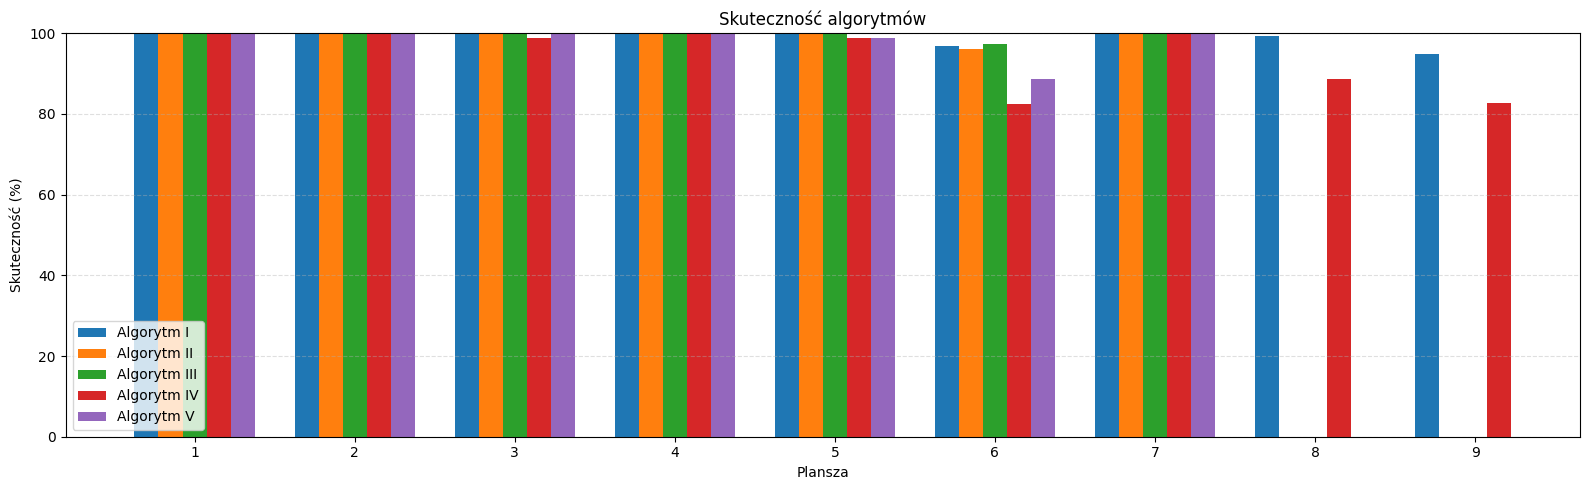

In [65]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.15

alg1 = [100, 100, 100, 100, 100, 96.94, 100, 99.26, 94.80]
alg2 = [100, 100, 100, 100, 100, 96.18, 100, np.nan, np.nan]
alg3 = [100, 100, 100, 100, 100, 97.22, 100, np.nan, np.nan]
alg4 = [100, 100, 98.75, 100, 98.75, 82.50, 100, 88.71, 82.62]
alg5 = [100, 100, 100, 100, 98.82, 88.61, 100, np.nan, np.nan]

x = np.arange(1, 10)

plt.figure(figsize=(16, 5))

plt.bar(x - 2*width, alg1, width, label='Algorytm I')
plt.bar(x - width, alg2, width, label='Algorytm II')
plt.bar(x, alg3, width, label='Algorytm III')
plt.bar(x + width, alg4, width, label='Algorytm IV')
plt.bar(x + 2*width, alg5, width, label='Algorytm V')

plt.title('Skuteczność algorytmów')
plt.xlabel('Plansza')
plt.ylabel('Skuteczność (%)')
plt.xticks(x)
plt.ylim(0, 100.1)
plt.legend(loc='lower left')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()



Powyższy wykres przedstawia porównanie skuteczności pięciu algorytmów w zależności od rozmiaru planszy.

Wszystkie algorytmy dobrze poradziły sobie z małymi planszami - jedynie algorytm IV ma nieco gorszy wynik dla planszy pięciokolorowej (3).

Algorytmy IV i V wypadły nieco gorzej od pozostałych przy średniej planszy dwukolorowej (5), i dużo gorzej przy pięciokolorowej (6)

Z planszą dużą trzykolorową (7) wszystkie algorytmy poradziły sobie bardzo dobrze. Przy większych liczbach kolorów jedynie algorytmy I i IV były w stanie znaleźć rozwiązania w rozsądnym czasie, chociaż dla algorytmu IV nie są one najlepsze (8 i 9).

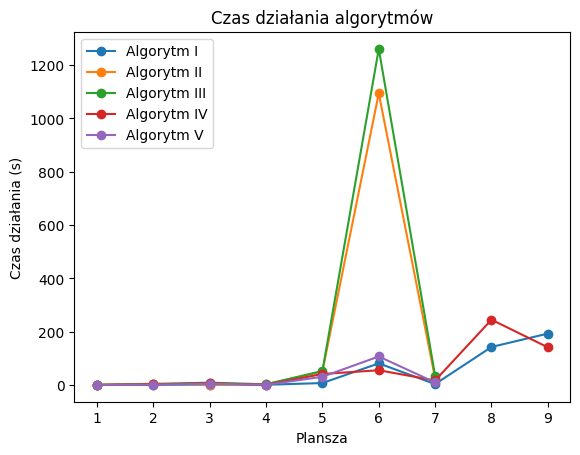

In [66]:
import matplotlib.pyplot as plt

x = range(1, 10)

plt.plot(x, [0.116, 0.605, 1.523, 0.700, 7.135, 80.99, 3.25, 142.49, 192.72], 'o-')
plt.plot(x, [0.453, 4.823, 1.523, 2.393, 50.32, 1094.13, 24.59, None, None], 'o-')
plt.plot(x, [0.473, 3.647, 8.676, 2.441, 52.35, 1260.64, 34.04, None, None], 'o-')
plt.plot(x, [0.123, 2.507, 6.662, 0.565, 41.21, 55.16, 16.74, 244.84, 141.11], 'o-')
plt.plot(x, [0.134, 1.159, 4.487, 0.664, 30.66, 106.78, 9.42, None, None], 'o-')

plt.title('Czas działania algorytmów')
plt.ylabel('Czas działania (s)')
plt.xlabel('Plansza')
plt.legend(
    ['Algorytm I', 'Algorytm II', 'Algorytm III', 'Algorytm IV', 'Algorytm V'],
    loc='upper left'
)
plt.xticks(x)

plt.show()


Dla mniej skomplikowanych plansz wszystkie algorytmy mają bardzo podobny czas. Warto zauważyć, że dla planszy średniej pięciokolorowej (6) najskuteczniejsze algorytmy (II i III) wymagały bardzo dużej ilości czasu. Bardzo prawdopodobne, że dla dużej planszy (8 i 9) różnica czasu pomiędzy tymi dwoma algorytmami a pozostałymi byłaby jeszcze większa.

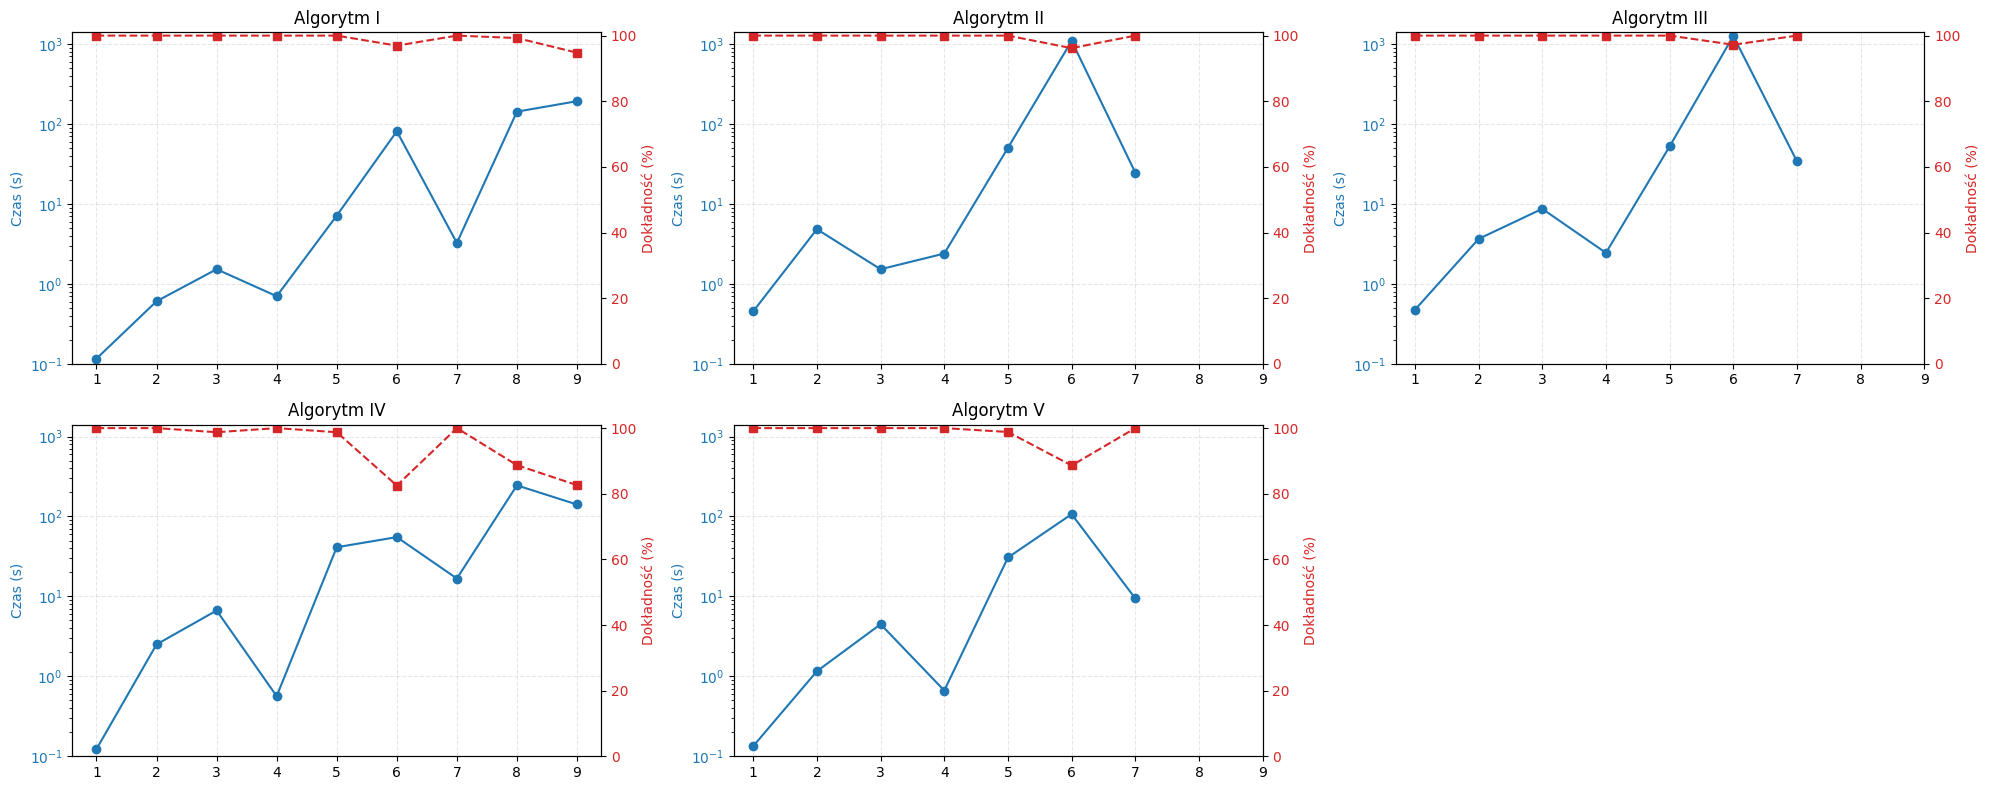

In [67]:
import matplotlib.pyplot as plt

labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
x = range(len(labels))

times = {
    'I':   [0.116, 0.605, 1.523, 0.700, 7.135, 80.99, 3.25, 142.49, 192.72],
    'II':  [0.453, 4.823, 1.523, 2.393, 50.32, 1094.13, 24.59, None, None],
    'III': [0.473, 3.647, 8.676, 2.441, 52.35, 1260.64, 34.04, None, None],
    'IV':  [0.123, 2.507, 6.662, 0.565, 41.21, 55.16, 16.74, 244.84, 141.11],
    'V':   [0.134, 1.159, 4.487, 0.664, 30.66, 106.78, 9.42, None, None]
}

accuracies = {
    'I':   [100, 100, 100, 100, 100, 96.94, 100, 99.26, 94.80],
    'II':  [100, 100, 100, 100, 100, 96.18, 100, None, None],
    'III': [100, 100, 100, 100, 100, 97.22, 100, None, None],
    'IV':  [100, 100, 98.75, 100, 98.75, 82.50, 100, 88.71, 82.62],
    'V':   [100, 100, 100, 100, 98.82, 88.61, 100, None, None]
}

algorithms = ['I', 'II', 'III', 'IV', 'V']

min_time = 0.1
max_time = 1400
min_acc = 0
max_acc = 101

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
axes = axes.flatten()

for i, alg in enumerate(algorithms):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    ax1.plot(x, times[alg], 'o-', color='tab:blue', label='Czas działania')
    ax1.set_yscale('log')
    ax1.set_ylabel('Czas (s)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_ylim(min_time, max_time)
    ax1.grid(True, linestyle='--', alpha=0.3)
    
    ax2.plot(x, accuracies[alg], 's--', color='tab:red', label='Dokładność')
    ax2.set_ylabel('Dokładność (%)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.set_ylim(min_acc, max_acc)
    
    ax1.set_title(f'Algorytm {alg}')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


Powyższe wykresy zestawiają czas i dokładność każdego algorytmu w celu łatwiejszego porównania. Wspólną cechą wszystkich algorytmów okazała się trudność w znalezieniu rozwiązania wynikająca nie z rozmiaru planszy, a raczej z ilości kolorów.

Z przeprowadzonych eksperymentów można wysunąć następujące wnioski:

* **Algorytm I** - najbardziej zrównoważony – zachowuje wysoką skuteczność dla małych i średnich plansz oraz jako jedyny dostarcza dość dobre wyniki także dla największych instancji.
* **Algorytm II** - skuteczny dla prostych i średnich problemów, jednak wraz ze wzrostem złożoności jego czas działania gwałtownie rośnie, co wskazuje na bardzo słabą skalowalność.
* **Algorytm III** - osiąga dobrą skuteczność, choć najdroższy obliczeniowo – ekstremalnie długie czasy działania powodują timeouty dla dużych plansz.
* **Algorytm IV** - najbardziej przewidywalny czasowo i odporny na timeouty, ale wyraźnie traci na jakości rozwiązania wraz ze wzrostem rozmiaru planszy i liczby kolorów.
* **Algorytm V** - bardzo szybki i skuteczny dla mniejszych instancji, lecz wraz ze wzrostem złożoności problemu jego skuteczność spada.

Mimo prób doskonalenia algorytmów, **Algorytm I** pozostaje najprostszy, najskuteczniejszy i najbardziej przewidywalny.

### Podsumowanie

Stosowanie algorytmu genetycznego wiąże się z pewną losowością, co sprawia, że rozwiązania mogą sięgać od bardzo prostych do niezwykle skomplikowanych, wymagających ogromu pracy po stronie komputera.

Powyższe eksperymenty wydają się dawać więcej pytań niż odpowiedzi, zwłaszcza dotyczących parametrów algorytmu genetycznego:

* Czy da się zmodyfikować algorytm, aby dokonywał wyboru w sposób "bardziej inteligentny"?
* Być może taktyka "duża populacja i mała liczba generacji", polegająca na wygenerowaniu dużej liczby chromosomów w nadziei, że jakaś część będzie dobrym rozwiązaniem byłaby bardziej efektywna niż próba naprawy małej populacji przez setki generacji?
* Czy stosowanie nagrody w funkcji **fitness** zamiast kary dałoby lepszy wynik?
* Jak większa/mniejsza szansa na mutację genów wpłynęłaby na zachowanie algorytmu?
* Czy dopuszczenie usuwania pojedynczych kafelków polepszyłoby wyniki, czy jedynie skłoniło algorytm to wybierania głównie pojedynczych kafelków?
* Czy algorytm działałby lepiej gdyby wybierał **grupy** zamiast kafelków?

Jednakże znalezienie odpowiedzi na te pytania wymaga zdecydowanie większej ilości czasu oraz mocy obliczeniowej.



### Zmiany w 2026
- Algorytm IV
- Algorytm V
- Lekka zmiana parametrów (mniejsza liczba generacji)
- Więcej kroków (dłuższe chromosomy)
- Nowe wykresy

### Bibliografia

1. https://en.wikipedia.org/wiki/Genetic_algorithm
2. https://pl.wikipedia.org/wiki/Algorytm_genetyczny
3. https://en.wikipedia.org/wiki/SameGame
4. https://pypi.org/project/colorama/
5. https://pygad.readthedocs.io/en/latest/
6. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
7. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html